# Imports

In [1]:
!pip install feature_engine

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import gaussian_kde
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('Medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# outlyer detection

In [7]:
numvars = df.select_dtypes(exclude="O").columns.to_list()
numvars

['age', 'bmi', 'children', 'charges']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='children'>

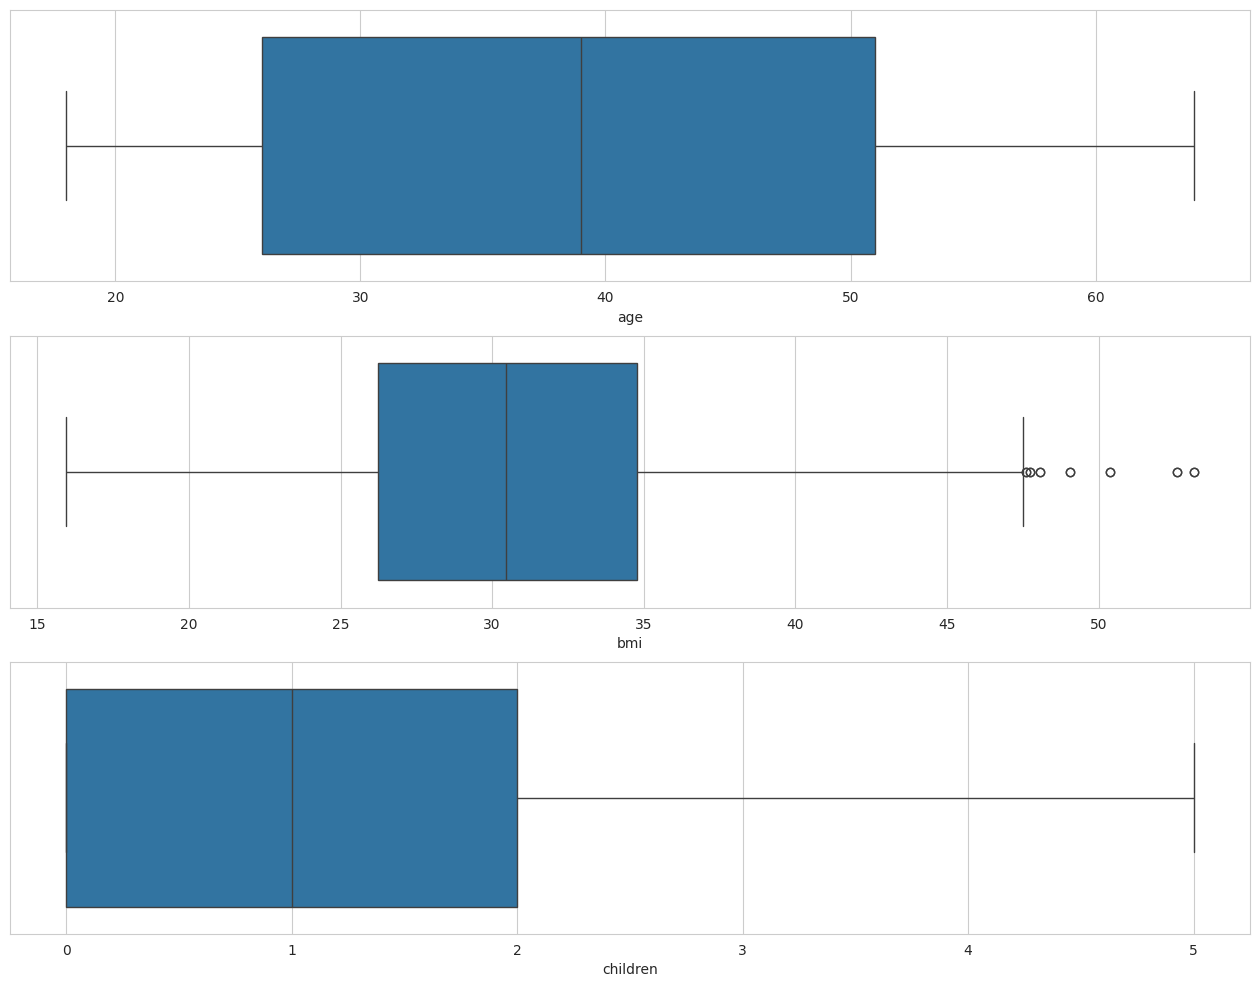

In [8]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,1,1)
sns.boxplot(x='age',data=df)
plt.subplot(3,1,2)
sns.boxplot(x='bmi',data=df)
plt.subplot(3,1,3)
sns.boxplot(x='children',data=df)

In [9]:
QT = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)
df.drop(df[(df['bmi'].values<(df['bmi'].quantile(0.25)-1.2*QT)) | (df['bmi'].values>(df['bmi'].quantile(0.75)+1.2*QT))].index,inplace = True)

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2766,18,male,23.320,1,no,southeast,1711.02680
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='bmi'>

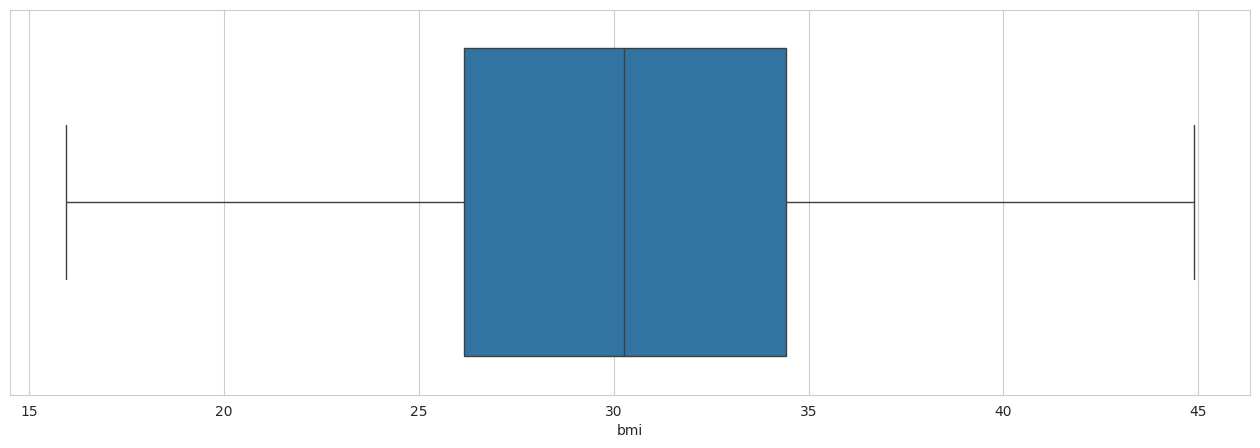

In [11]:
plt.figure(figsize=(16,5))
sns.set_style(style='whitegrid')
plt.subplot(1,1,1)
sns.boxplot(x='bmi',data=df)

In [12]:
df.reset_index(drop = True,inplace = True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(labels=["charges"], axis=1),
  df["charges"],
  test_size=0.2,
  random_state=0
)
train = X_train.copy()
ytrain = y_train.copy()
test = X_test.copy()
ytest = y_test.copy()

In [14]:
X_train.shape

(2182, 6)

In [15]:
X_test.shape

(546, 6)

In [16]:
X_train.reset_index(drop = True,inplace = True)
y_train.reset_index(drop = True,inplace = True)
X_test.reset_index(drop = True,inplace = True)
y_test.reset_index(drop = True,inplace = True)

# discrete

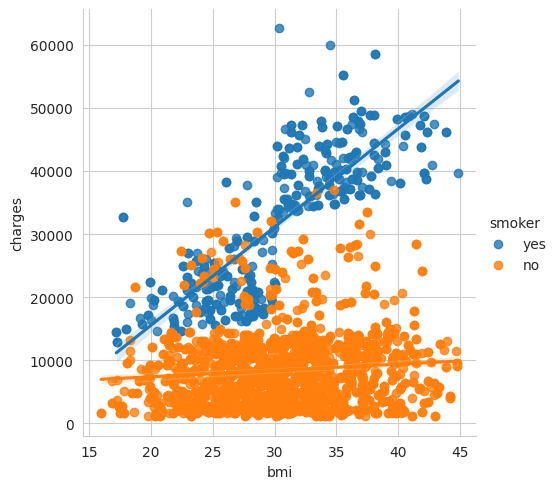

In [17]:
sns.lmplot(x="bmi",y="charges",hue='smoker',data=df.iloc[X_train.index])

In [18]:
dummies = pd.get_dummies(X_train['smoker'])
dummies = dummies.astype('float')
X_train['Ysmoke'] = X_train['bmi'] * dummies['yes']
X_train['Nsmoke'] = X_train['bmi'] * dummies['no']
X_train

,age,sex,bmi,children,smoker,region,Ysmoke,Nsmoke
0,32,male,28.880,0,no,northwest,0.0,28.880
1,48,male,35.625,4,no,northeast,0.0,35.625
2,44,female,27.500,1,no,southwest,0.0,27.500
3,18,male,33.660,0,no,southeast,0.0,33.660
4,19,female,22.515,0,no,northwest,0.0,22.515
...,...,...,...,...,...,...,...,...
2177,61,female,21.090,0,no,northwest,0.0,21.090
2178,41,male,34.200,2,no,northwest,0.0,34.200
2179,51,female,34.200,1,no,southwest,0.0,34.200
2180,29,male,29.640,1,no,northeast,0.0,29.640


In [19]:
dummies = pd.get_dummies(X_test['smoker'])
dummies = dummies.astype('float')
X_test['Ysmoke'] = X_test['bmi'] * dummies['yes']
X_test['Nsmoke'] = X_test['bmi'] * dummies['no']
X_test

,age,sex,bmi,children,smoker,region,Ysmoke,Nsmoke
0,36,female,29.920,0,no,southeast,0.000,29.920
1,47,male,38.940,2,yes,southeast,38.940,0.000
2,29,male,28.975,1,no,northeast,0.000,28.975
3,27,female,21.470,0,no,northwest,0.000,21.470
4,35,male,34.320,3,no,southeast,0.000,34.320
...,...,...,...,...,...,...,...,...
541,31,female,36.630,2,no,southeast,0.000,36.630
542,32,female,20.520,0,no,northeast,0.000,20.520
543,41,male,23.940,1,no,northeast,0.000,23.940
544,48,male,37.290,2,no,southeast,0.000,37.290


# Encoding

In [20]:
OE = OneHotEncoder(drop="first",sparse_output=False)

In [21]:
var = ['sex','smoker']

In [22]:
OE.fit(X_train[var])

OneHotEncoder(drop='first', sparse_output=False)

In [23]:
X_train_enc = OE.transform(
X_train[var])
X_test_enc = OE.transform(
X_test[var])

In [24]:
X_train[var[0]] = X_train_enc[:,0]
X_train[var[1]] = X_train_enc[:,1]
X_test[var[0]] = X_test_enc[:,0]
X_test[var[1]] = X_test_enc[:,1]
X_train

,age,sex,bmi,children,smoker,region,Ysmoke,Nsmoke
0,32,1.0,28.880,0,0.0,northwest,0.0,28.880
1,48,1.0,35.625,4,0.0,northeast,0.0,35.625
2,44,0.0,27.500,1,0.0,southwest,0.0,27.500
3,18,1.0,33.660,0,0.0,southeast,0.0,33.660
4,19,0.0,22.515,0,0.0,northwest,0.0,22.515
...,...,...,...,...,...,...,...,...
2177,61,0.0,21.090,0,0.0,northwest,0.0,21.090
2178,41,1.0,34.200,2,0.0,northwest,0.0,34.200
2179,51,0.0,34.200,1,0.0,southwest,0.0,34.200
2180,29,1.0,29.640,1,0.0,northeast,0.0,29.640


In [25]:
from feature_engine.encoding import OrdinalEncoder

In [26]:
ordinal_enc = OrdinalEncoder(encoding_method="ordered",variables=None)

In [27]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [28]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)
X_train

,age,sex,bmi,children,smoker,region,Ysmoke,Nsmoke
0,32,1.0,28.880,0,0.0,1,0.0,28.880
1,48,1.0,35.625,4,0.0,2,0.0,35.625
2,44,0.0,27.500,1,0.0,0,0.0,27.500
3,18,1.0,33.660,0,0.0,3,0.0,33.660
4,19,0.0,22.515,0,0.0,1,0.0,22.515
...,...,...,...,...,...,...,...,...
2177,61,0.0,21.090,0,0.0,1,0.0,21.090
2178,41,1.0,34.200,2,0.0,1,0.0,34.200
2179,51,0.0,34.200,1,0.0,0,0.0,34.200
2180,29,1.0,29.640,1,0.0,2,0.0,29.640


# analaysis and creating features

<ipython-input-29-bd639e5f7536>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax=ax,bins=20)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'Ysmoke'}>,
        <Axes: title={'center': 'Nsmoke'}>, <Axes: >]], dtype=object)

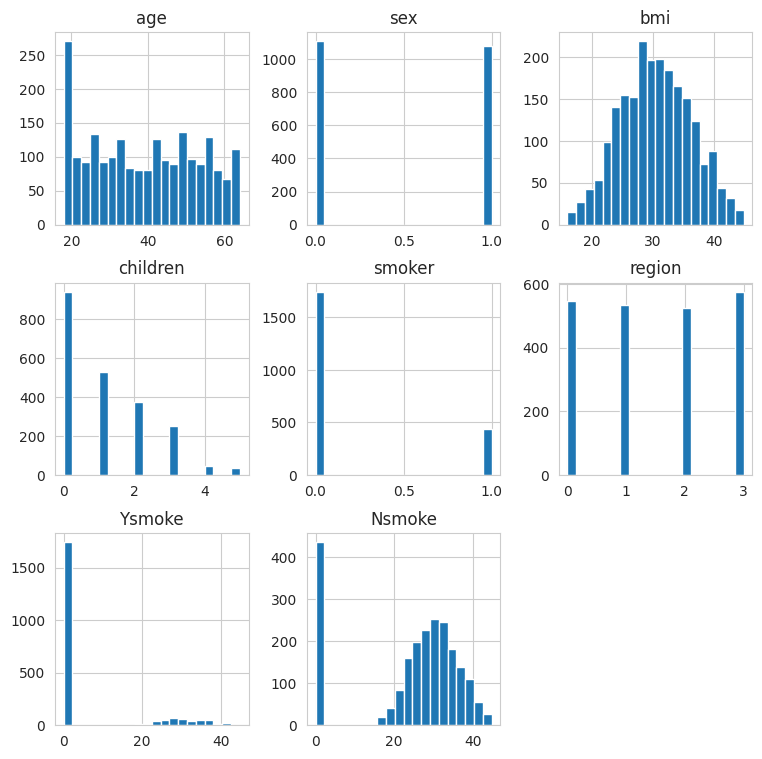

In [29]:
fig,ax =plt.subplots(figsize=(9,9))

X_train.hist(ax=ax,bins=20)

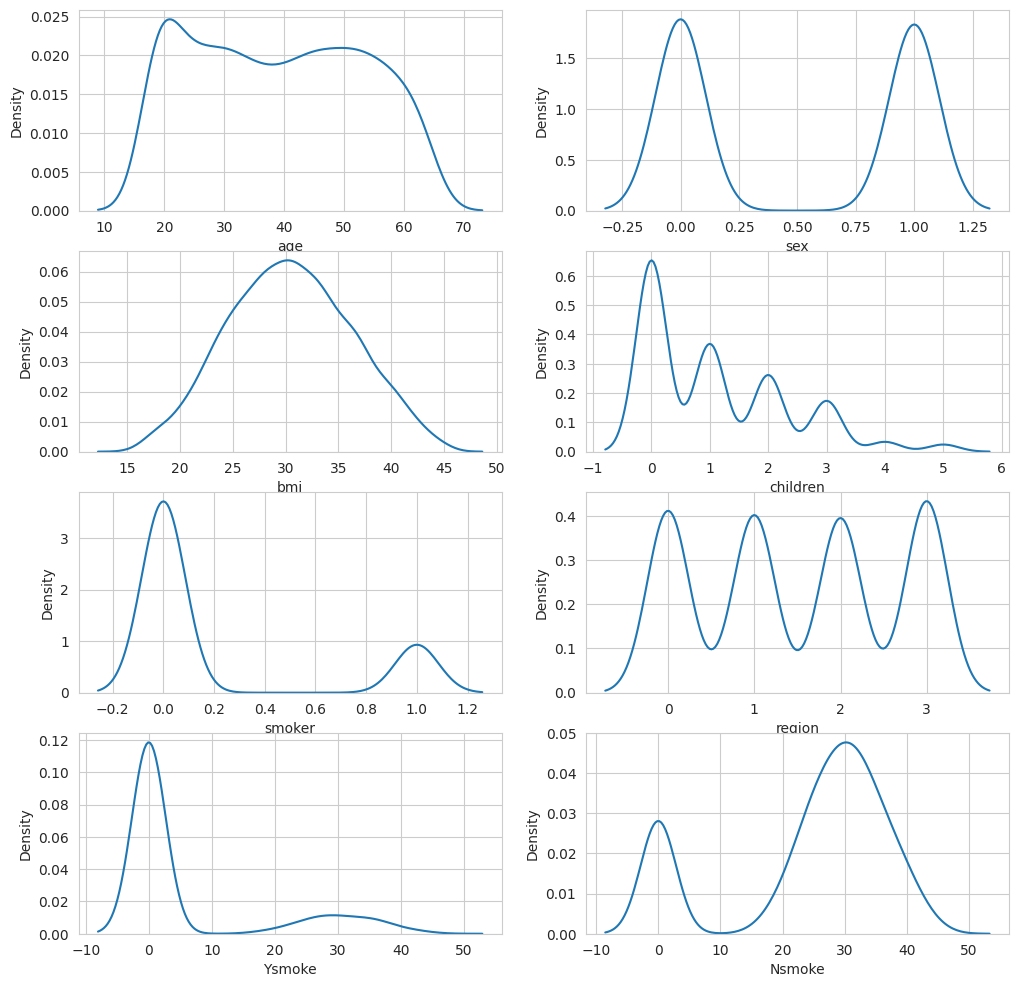

In [30]:
plt.figure(figsize=(12,12))
sns.set_style(style='whitegrid')
for i in range(8):
   plt.subplot(4,2,i+1)
   sns.kdeplot(X_train.iloc[:,i])

In [31]:
X_train['Ysmoke'].min()

0.0

In [32]:
from feature_engine.transformation import YeoJohnsonTransformer

In [33]:
bct = YeoJohnsonTransformer(variables=['Ysmoke'])
bct.fit(X_train)
X_train =  bct.transform(X_train)

<Axes: >

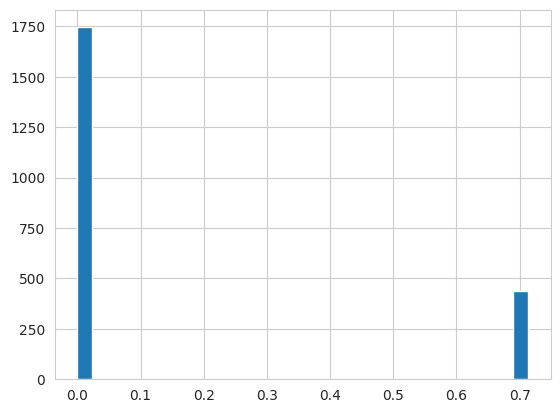

In [34]:
X_train['Ysmoke'].hist(bins=30)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'Ysmoke'}>,
        <Axes: title={'center': 'Nsmoke'}>, <Axes: >]], dtype=object)

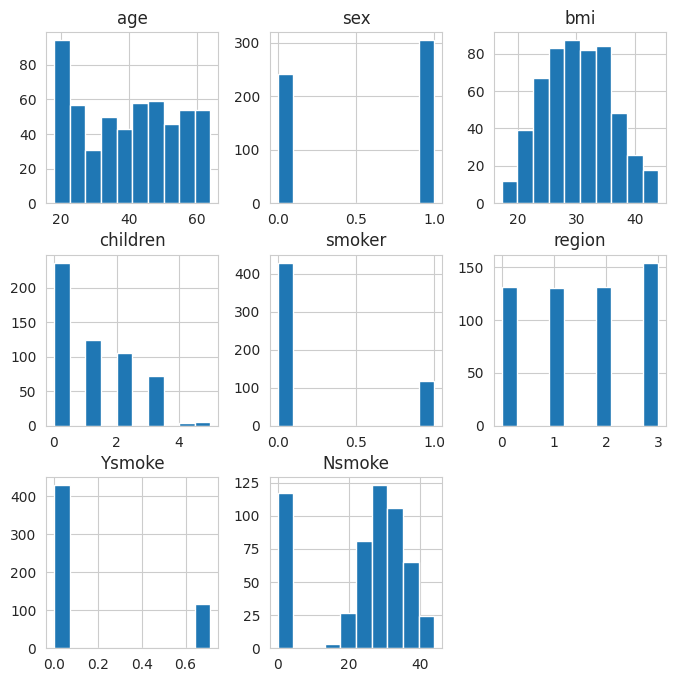

In [35]:
X_test =  bct.transform(X_test)
X_test.hist(figsize=(8,8))

# Discretization

In [36]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [37]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [38]:
variables = ['age']
disc = EqualWidthDiscretiser(bins=8,variables=variables, return_object=True)

In [39]:
disc.fit(X_train)

EqualWidthDiscretiser(bins=8, return_object=True, variables=['age'])

In [40]:
X_train_t = disc.transform(X_train)
X_test_t = disc.transform(X_test)
X_train['Cage'] = X_train_t['age']
X_test['Cage'] = X_test_t['age']
X_train

,age,sex,bmi,children,smoker,region,Ysmoke,Nsmoke,Cage
0,32,1.0,28.880,0,0.0,1,-0.0,28.880,2
1,48,1.0,35.625,4,0.0,2,-0.0,35.625,5
2,44,0.0,27.500,1,0.0,0,-0.0,27.500,4
3,18,1.0,33.660,0,0.0,3,-0.0,33.660,0
4,19,0.0,22.515,0,0.0,1,-0.0,22.515,0
...,...,...,...,...,...,...,...,...,...
2177,61,0.0,21.090,0,0.0,1,-0.0,21.090,7
2178,41,1.0,34.200,2,0.0,1,-0.0,34.200,3
2179,51,0.0,34.200,1,0.0,0,-0.0,34.200,5
2180,29,1.0,29.640,1,0.0,2,-0.0,29.640,1


In [41]:
X_train['Cage'] = X_train['Cage'].astype(int)
X_train.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region        int64
Ysmoke      float64
Nsmoke      float64
Cage          int64
dtype: object

# feature selection

In [42]:
from sklearn.feature_selection import mutual_info_regression

In [43]:
def make_mi_scores(X, y):
    X = X.copy()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [44]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [45]:
X_train.join(y_train).corr()

,age,sex,bmi,children,smoker,region,Ysmoke,Nsmoke,Cage,charges
age,1.000000,-0.003845,0.116592,0.025756,-0.016288,-0.003416,-0.016162,0.059125,0.992483,0.299021
sex,-0.003845,1.000000,0.040955,0.022403,0.090485,-0.000188,0.090714,-0.080902,-0.004103,0.079304
bmi,0.116592,0.040955,1.000000,-0.011151,0.009439,0.148182,0.010662,0.340055,0.110922,0.197184
children,0.025756,0.022403,-0.011151,1.000000,0.000130,-0.056908,0.000076,-0.004411,0.017162,0.058243
smoker,-0.016288,0.090485,0.009439,0.000130,1.000000,0.070565,0.999996,-0.920181,-0.010899,0.793257
region,-0.003416,-0.000188,0.148182,-0.056908,0.070565,1.000000,0.070646,-0.011354,0.000636,0.083403
Ysmoke,-0.016162,0.090714,0.010662,0.000076,0.999996,0.070646,1.000000,-0.920177,-0.010776,0.794168
Nsmoke,0.059125,-0.080902,0.340055,-0.004411,-0.920181,-0.011354,-0.920177,1.000000,0.051814,-0.714854
Cage,0.992483,-0.004103,0.110922,0.017162,-0.010899,0.000636,-0.010776,0.051814,1.000000,0.300472
charges,0.299021,0.079304,0.197184,0.058243,0.793257,0.083403,0.794168,-0.714854,0.300472,1.000000


In [46]:
mi_scores = make_mi_scores(X_train, y_train)

In [47]:
mi_scores

age         2.073046
Cage        1.309742
Nsmoke      0.908514
bmi         0.685876
children    0.506529
Ysmoke      0.500901
region      0.433728
smoker      0.388536
sex         0.354176
Name: MI Scores, dtype: float64

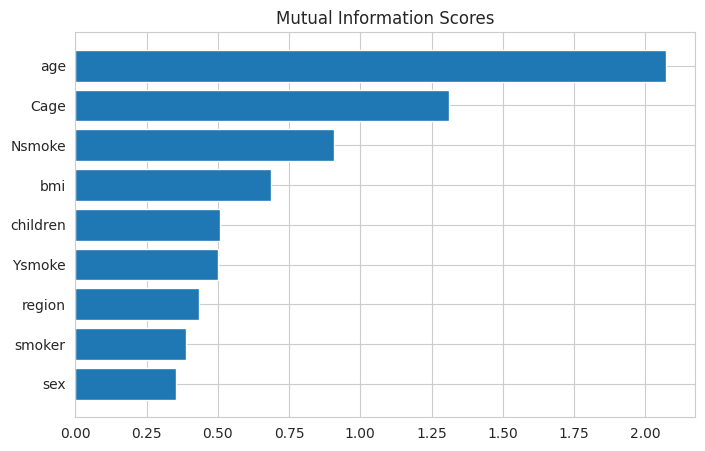

In [48]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA()
features = mi_scores.index.to_list()[:5]
a = X_train.copy()
X_scaled = (a - a.mean(axis=0)) / a.std(axis=0)
X_pca = pca.fit_transform(X_scaled)

c=X_test.copy()
X_tscaled = (c - c.mean(axis=0)) / c.std(axis=0)
X_tpca = pca.transform(X_tscaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_tpca = pd.DataFrame(X_tpca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.619946,-0.831693,-0.072529,0.157666,-1.453139,-0.041984,0.010575,0.000544,0.000062
1,-1.136428,1.123519,0.376115,2.387764,1.051932,0.544287,-0.061694,0.115160,-0.000081
2,-0.827480,0.272223,-1.445248,-0.622439,0.184837,-0.761051,0.044698,-0.000374,0.000060
3,-0.723266,-1.931923,1.844537,0.131261,-0.897667,0.606156,-0.041980,0.107106,-0.000055
4,-0.281959,-2.256581,-1.001621,-1.393914,-0.204988,0.079904,0.100252,0.050421,-0.000002


PC2    1.862212
PC9    1.224519
PC1    1.181193
PC8    0.934520
PC7    0.926463
PC4    0.831036
PC3    0.795579
PC6    0.728074
PC5    0.714549
Name: MI Scores, dtype: float64


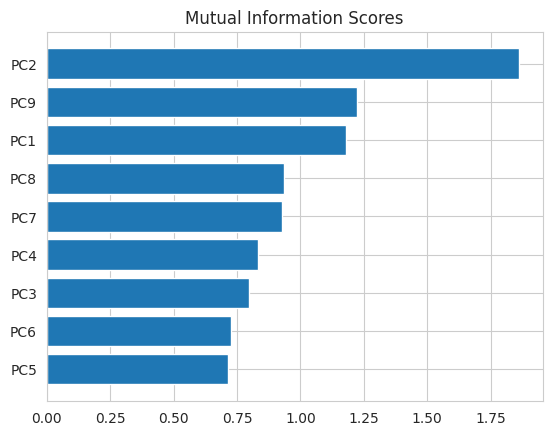

In [51]:
pca_mi = make_mi_scores(X_pca,y_train)
print(pca_mi)
plot_mi_scores(pca_mi)

In [52]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=a.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
age,-0.063924,0.693193,-0.097319,-0.038137,-0.029181,0.055999,-0.007934,-0.707404,0.000063
sex,0.075556,0.016753,0.140905,0.676486,-0.679789,0.233087,-0.009012,0.000329,0.000018
bmi,-0.096829,0.156532,0.681055,0.221499,0.148084,-0.591518,0.285278,0.000369,0.004215
children,0.000295,0.026343,-0.229411,0.674517,0.681271,0.165944,0.000043,0.006016,-0.000037
smoker,0.571441,0.078402,0.093417,0.006879,0.052685,-0.128461,-0.381517,0.003966,0.702627
region,0.037741,0.030587,0.635075,-0.174628,0.209977,0.720919,0.001295,-0.003000,-0.000053
Ysmoke,0.571402,0.078586,0.094173,0.007233,0.052682,-0.129182,-0.364310,0.003650,-0.711481
Nsmoke,-0.568102,-0.015914,0.154627,0.064353,0.011590,-0.092099,-0.800062,0.012204,-0.009579
Cage,-0.060167,0.693177,-0.096876,-0.046279,-0.034650,0.060885,0.009758,0.706651,-0.000042


# pipeline

In [53]:
DT = DecisionTreeRegressor().fit(X_train,y_train)

In [54]:
DT.score(X_train,y_train)

0.9988864448426229

In [55]:
DT.score(X_test,y_test)

0.949758580328149

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

In [118]:
class CustomDropTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.y = y
        return self

    def transform(self, X):
       #QT = X['bmi'].quantile(0.75) - X['bmi'].quantile(0.25)
       #self.y=self.y.drop(X[(X['bmi'].values<(X['bmi'].quantile(0.25)-1.2*QT)) | (X['bmi'].values>(X['bmi'].quantile(0.75)+1.2*QT))].index)
       #X=X.drop(X[(X['bmi'].values<(X['bmi'].quantile(0.25)-1.2*QT)) | (X['bmi'].values>(X['bmi'].quantile(0.75)+1.2*QT))].index)

       X=X.drop(columns=['smoker'])
       return X

In [119]:
class CustominteractTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
     dummies = pd.get_dummies(X['smoker'])
     dummies = dummies.astype('float')
     X['Ysmoke'] = X['bmi'] * dummies['yes']
     X['Nsmoke'] = X['bmi'] * dummies['no']
     return X

In [120]:
first_steps = Pipeline(steps=[
    ('drops', CustomDropTransformer()),
    ('interact', CustominteractTransformer())
])

In [121]:
num_transformers = Pipeline(steps=[
    ('distrbution', YeoJohnsonTransformer(variables=['Ysmoke']))
])

In [122]:
one_hot = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'),['sex','smoker'])
])
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(encoding_method="ordered",variables=None))
])

In [123]:
PL = Pipeline(steps=[('interact', CustominteractTransformer()),
                     ('num', num_transformers),
                     ('cat', categorical_transformer),
                     ('drops', CustomDropTransformer()),
                     ('model', DecisionTreeRegressor())
])

In [124]:
PL.fit(train,ytrain)

Pipeline(steps=[('interact', CustominteractTransformer()),
                ('num',
                 Pipeline(steps=[('distrbution',
                                  YeoJohnsonTransformer(variables=['Ysmoke']))])),
                ('cat', Pipeline(steps=[('ordinal', OrdinalEncoder())])),
                ('drops', CustomDropTransformer()),
                ('model', DecisionTreeRegressor())])

In [125]:
PL.score(train,ytrain)

0.9988864448426229

In [126]:
PL.score(test,ytest)

0.9490139064159059

In [127]:
X_train.drop(columns=['smoker','Cage'],inplace = True)
X_test.drop(columns=['smoker','Cage'],inplace = True)

# Model

In [128]:
model = LinearRegression().fit(X_train,y_train)

In [129]:
model.score(X_train,y_train)

0.8393185084034407

In [130]:
model.score(X_test,y_test)

0.8206289165410032

In [131]:
DT = DecisionTreeRegressor().fit(X_train,y_train)

In [132]:
DT.score(X_train,y_train)

0.9988864448426229

In [133]:
DT.score(X_test,y_test)

0.9502043361988708

# save

In [134]:
import pickle

In [136]:
pickle.dump(PL,open('insurance_predicter.pkl','wb'))